# Threshold Adjustment

👇 Load the player `player_performances.csv` dataset to see what you will be working with.

In [1]:
## Your code here
import pandas as pd

data = pd.read_csv("data/player_performance.csv")

data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


ℹ️ Each observations represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

# Preprocessing

👇 To avoid spending too much time on the preprocessing, Robust Scale the entire feature set. This practice is not optimal, but can be used for preliminary preprocessing and/or to get models up and running quickly.

Save the scaled feature set as `X_scaled`.

In [2]:
## Your code here
from sklearn.preprocessing import RobustScaler
x = data.drop(columns=['target_5y'])
X_scaler = RobustScaler()
X_scaled = X_scaler.fit_transform(x)

### ☑️ Check your code

In [3]:
from nbresult import ChallengeResult

result = ChallengeResult('scaled_features',
                         scaled_features = X_scaled
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_scaled_features.py::TestScaled_features::test_scaled_features PASSED [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/scaled_features.pickle

git commit -m 'Completed scaled_features step'

git push origin master


# Base modelling

🎯 The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

👇 Is a default Logistic Regression model going to satisfy the coach's requirements? Use cross validation and save the score that supports your answer under variable name `base_score`.

In [14]:
## Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
y = data['target_5y']
model =  LogisticRegression(max_iter = 1000).fit(X_scaled, y) 
cv_results = cross_validate(model, X_scaled,y,scoring = "precision")

base_score = cv_results['test_score'].mean()
base_score

0.7346247634876919

### ☑️ Check your code

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('base_precision',
                         score = base_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_base_precision.py::TestBase_precision::test_precision_score PASSED [100%]

============================== 1 passed in 0.21s ===============================


💯 You can commit your code:

git add tests/base_precision.pickle

git commit -m 'Completed base_precision step'

git push origin master


# Threshold adjustment

👇 Find the decision threshold that guarantees a 90% precision for a player to last 5 years or more as a professional. Save the threshold under variable name `new_threshold`.

<details>
<summary>💡 Hint</summary>

- Make cross validated probability predictions with [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
    
- Plug the probabilities into [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) to generate precision scores at different thresholds

- Find out which threshold guarantees a precision of 0.9
      
</details>



In [19]:
## Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


# Predict class probabilties
data['less_5y'], data["more_5y"] =cross_val_predict(model,X_scaled, y,data['target_5y'],cv=5,method='predict_proba').T

# precision recall data
precision, recall, threshold = precision_recall_curve(y,data["more_5y"])

print(f'precision- {precision[:5]}')
print(f'recall- c')
print(f'threshold- {threshold[:5]}')

precision- [0.62292609 0.62264151 0.62311178 0.62358277 0.62405446]
recall- [1.         0.99878935 0.99878935 0.99878935 0.99878935]
threshold- [0.07674062 0.09561194 0.10298152 0.10620172 0.11859761]


/Users/selmalopez/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0       0
1       0
2       0
3       1
4       1
       ..
1324    0
1325    1
1326    0
1327    1
1328    1
Name: target_5y, Length: 1329, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [30]:
scores = {'precision': precision[:-1],'recall': recall[:-1],'threshold':threshold[:]}
scores

{'precision': array([0.62292609, 0.62264151, 0.62311178, ..., 0.75      , 0.66666667,
        1.        ]),
 'recall': array([1.        , 0.99878935, 0.99878935, ..., 0.00363196, 0.00242131,
        0.00121065]),
 'threshold': array([0.07674062, 0.09561194, 0.10298152, ..., 0.9857583 , 0.99335743,
        0.99676065])}

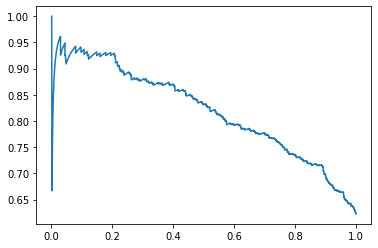

In [33]:
import matplotlib.pyplot as plt
scores = pd.DataFrame(scores)
plt.plot(scores['recall'], scores['precision'])

In [34]:
scores 

,precision,recall,threshold
0,0.622926,1.000000,0.076741
1,0.622642,0.998789,0.095612
2,0.623112,0.998789,0.102982
3,0.623583,0.998789,0.106202
4,0.624054,0.998789,0.118598
...,...,...,...
1292,0.833333,0.006053,0.984614
1293,0.800000,0.004843,0.984745
1294,0.750000,0.003632,0.985758
1295,0.666667,0.002421,0.993357


In [39]:
new_threshold = scores[scores['precision'] >= 0.9].threshold.min()
new_threshold

0.8626977113267628

### ☑️ Check your code

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult('decision_threshold',
                         threshold = new_threshold
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_decision_threshold.py::TestDecision_threshold::test_new_threshold PASSED [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/decision_threshold.pickle

git commit -m 'Completed decision_threshold step'

git push origin master


# Using the new threshold

🎯 The coach has spotted a potentially interesting player, but wants your 90% guarantee that he would last 5 years minimum as a pro. Download the player's data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_New_player.csv).

❓ Would you risk recommending the player to the coach? Save your answer as string under variable name `recommendation` as "recommend" or "not recommend".

In [42]:
import pandas as pd

data = pd.read_csv("data/new_player.csv")

data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


In [47]:
## Your code here
X_new = data

log_bask_model = model

if log_bask_model.predict(X_new)[0] == 1:
    recommendation = 'recommend'
else :
    recommendation= 'not recommand'


### ☑️ Check your code

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult('recommendation',
                         recommendation = recommendation
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_recommendation.py::TestRecommendation::test_recommendation PASSED [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/recommendation.pickle

git commit -m 'Completed recommendation step'

git push origin master


# 🏁